In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import json
import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')
from RiboGraphViz import RGV
from RiboGraphViz import LoopExtruder, StackExtruder
from ipynb.draw import draw_struct

## Me trying to save draw RNA to a smaller size and get rid of the gray things

In [2]:
with open('./data/figure/allclasses.txt', 'r') as fh:
    allclasses = fh.readlines()

In [3]:
if len(allclasses) % 5 == 4:
    allclasses.append('\n')
classes_arr = np.array([s.strip('\n') for s in allclasses]).reshape(-1, 5)[:,:4]

In [4]:
df = pd.DataFrame(data=classes_arr, columns=['seqname', 'sequence', 'structure', 'color'])

In [5]:
import os
def save_fig(filename, fig=None, dpi=300):

    figdir, _ = os.path.split(filename)
    if not os.path.isdir(figdir):
        os.makedirs(figdir)

    if fig is None:
        plt.savefig(filename, dpi=dpi, bbox_inches='tight', transparent=True)
    else:
        fig.savefig(filename, dpi=dpi, bbox_inches='tight', transparent=True)
        
def save_multi_image(filename):
    pp = PdfPages(filename)
    fig_nums = plt.get_fignums()
    figs = [plt.figure(n) for n in fig_nums]
    for fig in figs:
        fig.savefig(pp, format='pdf')
    pp.close()

/var/folders/_q/8__k6pc13sd827z6scxzrbnc0000gn/T/ipykernel_80708/1135693835.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(4,5))


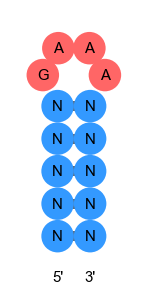

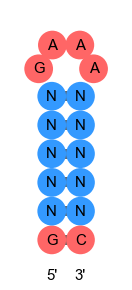

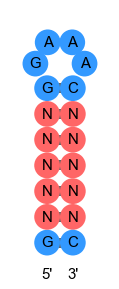

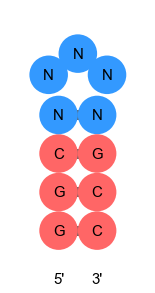

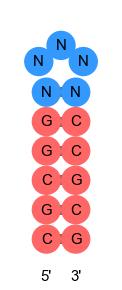

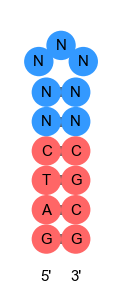

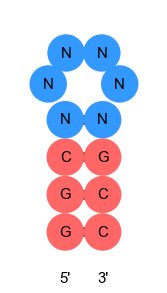

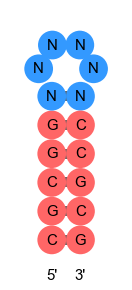

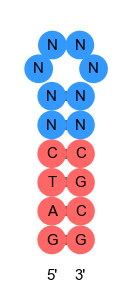

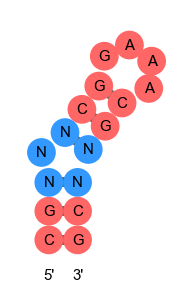

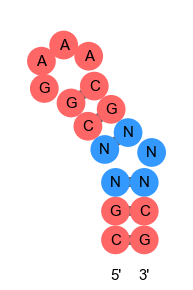

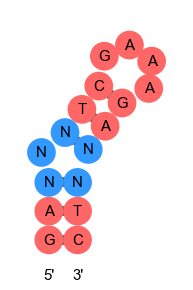

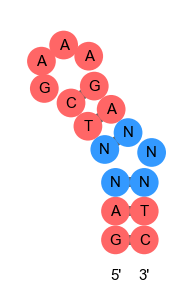

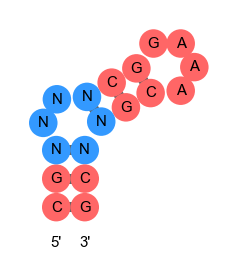

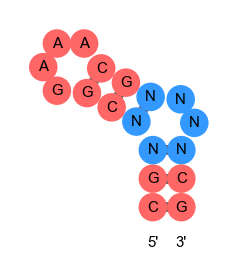

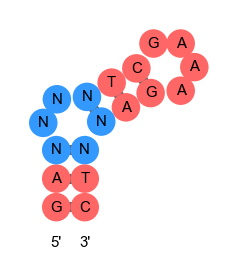

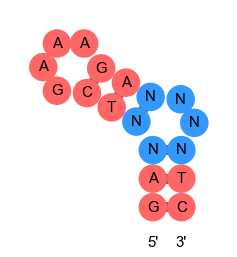

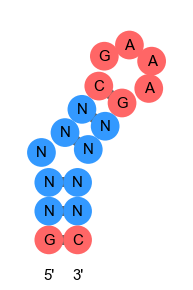

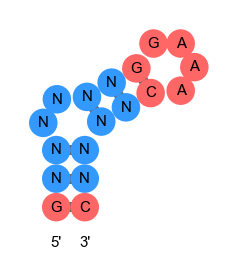

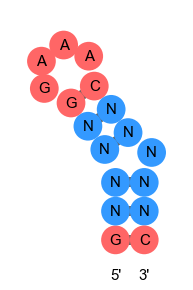

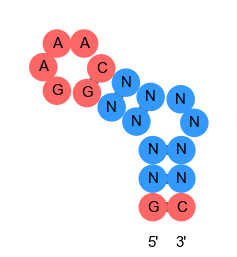

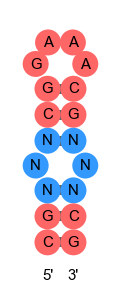

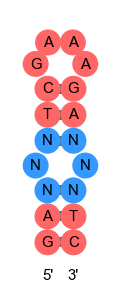

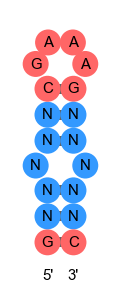

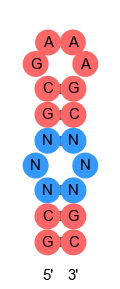

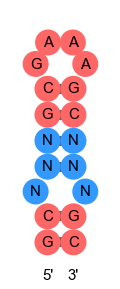

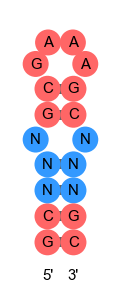

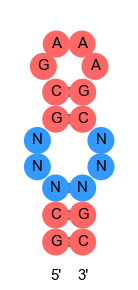

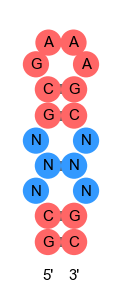

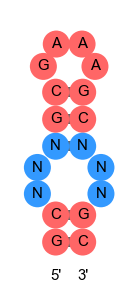

In [9]:
figdir = './fig/allclasses/'
    
for i,row in df.iterrows():

    filename = figdir + row.seqname + '.svg'
    fig, ax = plt.subplots(figsize=(4,5))
    draw_struct(row.sequence, row.structure, row.color, ax=ax)
    save_fig(filename, fig, dpi=300)

## Class sizes

In [52]:
import squarify

# these values define the coordinate system for the returned rectangles
# the values will range from x to x + width and y to y + height
x = 0.
y = 0.
width = 700.
height = 433.

values = [500, 433, 78, 25, 25, 7]

# values must be sorted descending (and positive, obviously)
values.sort(reverse=True)

# the sum of the values must equal the total area to be laid out
# i.e., sum(values) == width * height
values = squarify.normalize_sizes(values, width, height)

# returns a list of rectangles
rects = squarify.squarify(values, x, y, width, height)

# padded rectangles will probably visualize better for certain cases
padded_rects = squarify.padded_squarify(values, x, y, width, height)

In [15]:
from nnn.arraydata import ArrayData
replicate_df = pd.read_table('./data/nnnlib2b_replicates.tsv')
arraydata = ArrayData(replicate_df=replicate_df.iloc[:3,:],
                      annotation_file='./data/annotation/NNNlib2b_annotation_20220418.tsv')
annotation = pd.read_table('./data/annotation/NNNlib2b_annotation_20220418.tsv')

86.43% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
86.41% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
80.98% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5


ValueError: Could not interpret input 'dG_37_bin'

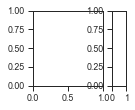

In [18]:
df = arraydata.data.join(annotation)
cm = 1/2.54
fig, (ax, lax) = plt.subplots(1, 2, figsize=(4.25*cm, 3.5*cm), gridspec_kw={"width_ratios":[5,1]})
# fig, ax = plt.subplots(figsize=(4.25*cm, 3.5*cm))
sns.boxplot(data=df, orient='h', x='dG_37_se', y='Series', hue='dG_37_bin', 
            showfliers = False, palette='magma', linewidth=0.25, ax=ax)

ax.get_legend().remove()
ax.set_ylabel('')
ax.set_xlabel('s.e. of $dG_{37}$ (kcal/mol)')
plt.yticks(fontsize=3)
ax.xaxis.set_minor_locator(MultipleLocator(0.4))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
sns.despine(trim=False)

h,l = ax.get_legend_handles_labels()
lax.legend(h,l, borderaxespad=0, prop={'size': 4})
lax.axis("off")
util.save_fig('./fig/uncertainty_breakdown/dG_se_by_series.pdf')